In [770]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import pickle
import IPython
import IPython.display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from functions.naming import rename_columns

In [1977]:
# Load the data
df = pd.read_excel("/Users/athanasioskaravangelis/Desktop/RSM BAM/Workshop/pko_forecasting/data/PKO_Initial_Dataset.xlsx")
#rename columns
df = rename_columns(df)
# select only the values after 2010-01-01
df['date'] = pd.to_datetime(df['date'], format='%b-%y')
df = df[df['date'] > '2009-12-02']
#make date the index
df.set_index('date', inplace=True)

In [1978]:
# Specify columns to exclude
exclude_columns = [
    'indonesia_disaster', 'malaysia_disaster', 'jet_fuel_us', 'jet_fuel_europe', 'soybean_oil_zlz2',
    'tallow_fob_us_gulf', 'palm_olein_fob_malaysia',
    'palm_stearin_cif_rotterdam', 'fatty_alcohol_c12_14_fob_asia', 'fatty_alcohol_c16_18_fob_asia',
    'fatty_alcohol_c12_14_fd_nwe', 'jet_fuel_us_usd_mt', 'rspo', 'bio_ethanol', 'cpopc_mal_ind_2015', 'mspo_certification', 'ispo_certification',
    'export_tarrifs_indonesia', 'palm_oil_cif_nwe'
]

# Filter the dataset to exclude specified columns
df_filtered = df.drop(columns=exclude_columns)

# Update NUM_FEATURES based on the filtered dataset
num_features = df_filtered.shape[1]
num_features

# fill nas with average values
df = df_filtered.fillna(df_filtered.mean())

target_column = 'pko_fob_malaysia'

data = df.copy()

# make the target column the first column in the order
target_column_index = data.columns.get_loc(target_column)
#data = data[[data.columns[target_column_index]] + [c for c in data if c != data.columns[target_column_index]]]

# create a custom order for my dataframe columns
# the order is : 'pko_cif_rotterdam', 'pko_monthly_stocks_malaysia', 'pko_monthly_stocks_indonesia', 'Temperaturemax_Indonesia'
# Temperaturemin_Malaysia, Temperaturemin_Indonesia, Temperaturemax_Malaysia, Precipitation_Indonesia, Precipitation_Malaysia
# Humidex_Indonesia, Humidex_Malaysia and then the rist of the rows
data = data[['pko_cif_rotterdam','pko_monthly_stocks_malaysia', 'pko_monthly_stocks_indonesia', 'Temperaturemax_Indonesia',
                'Temperaturemin_Malaysia', 'Temperaturemin_Indonesia', 'Temperaturemax_Malaysia', 'Precipitation_Indonesia',
                'Precipitation_Malaysia', 'Humidex_Indonesia', 'Humidex_Malaysia'] + [c for c in data if c not in ['pko_cif_rotterdam', 'pko_monthly_stocks_malaysia', 'pko_monthly_stocks_indonesia', 'Temperaturemax_Indonesia',
                'Temperaturemin_Malaysia', 'Temperaturemin_Indonesia', 'Temperaturemax_Malaysia', 'Precipitation_Indonesia',
                'Precipitation_Malaysia', 'Humidex_Indonesia', 'Humidex_Malaysia']]]

# Normalize the data
# Note: We should normalize the features but not the target variable
feature_columns = [col for col in data.columns if col != target_column and col != 'Date']

# Handling non-numeric values (e.g., replacing commas in numbers)
data[feature_columns] = data[feature_columns].replace(',', '', regex=True).astype(float)

# Using MinMaxScaler for normalization
#scaler = MinMaxScaler()
#data[feature_columns] = scaler.fit_transform(data[feature_columns])

data.head()

,pko_cif_rotterdam,pko_monthly_stocks_malaysia,pko_monthly_stocks_indonesia,Temperaturemax_Indonesia,Temperaturemin_Malaysia,Temperaturemin_Indonesia,Temperaturemax_Malaysia,Precipitation_Indonesia,Precipitation_Malaysia,Humidex_Indonesia,...,palm_oil_production_malaysia,pko_production_malaysia,pko_domestic_consumption_indonesia,pko_domestic_consumption_malaysia,pko_exports_indonesia,pko_exports_malaysia,pko_total_supply_indonesia,pko_total_supply_malaysia,pmi_indonesia,pmi_malaysia
date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,878.0,347.569305,278.311167,30.71202,22.47141,22.33558,31.12185,0.418410,0.361239,35.65479,...,1586.233389,185.118824,225.469878,108.663799,87.660354,125.476206,233.418248,395.552877,49.845,48.462617
2010-02-01,894.0,347.569305,278.311167,31.22701,22.48973,22.71100,32.42118,0.347598,0.176073,36.78451,...,1586.233389,185.118824,225.469878,108.663799,87.660354,125.476206,233.418248,395.552877,49.845,48.462617
2010-03-01,995.0,347.569305,278.311167,31.30822,23.15041,22.81132,33.46994,0.429777,0.244998,36.81526,...,1586.233389,185.118824,225.469878,108.663799,87.660354,125.476206,233.418248,395.552877,49.845,48.462617
2010-04-01,1020.0,347.569305,278.311167,31.53292,23.68263,23.15416,32.85302,0.412347,0.294569,37.50045,...,1586.233389,185.118824,225.469878,108.663799,87.660354,125.476206,233.418248,395.552877,49.845,48.462617
2010-05-01,1030.0,347.569305,278.311167,31.51028,23.89869,23.38245,32.93819,0.402333,0.315503,37.76451,...,1586.233389,185.118824,225.469878,108.663799,87.660354,125.476206,233.418248,395.552877,49.845,48.462617


In [1979]:
# i want to create a dataframe with the averages for each month of the year using values from 2021,2022,2023 of the features that I want to use
# for the forecasting
# first i need to create a column with the month of each date
averages_df = data.copy()

averages_df['month'] = averages_df.index.month
averages_df['year'] = averages_df.index.year

# i want to use the values from 2021,2022,2023 to create the averages
averages_df = averages_df[averages_df['year'] > 2020]

# i want to use the values from 2021,2022,2023 to create the averages
averages_df = averages_df[averages_df['year'] < 2024]

# average all features by month
averages_df = averages_df.groupby(['month']).mean()
# ASSUME THAT ONI DECREASES BY 0.1 EVERY MONTH AFTER the last row of the data dataframe
for i in range(1, 13):
    averages_df.loc[i, 'ONI'] = data['ONI'].iloc[-1] - (0.1 * i)

averages_df_arr = averages_df.values[:, :11]
averages_df_arr.shape

average_scaler = MinMaxScaler(feature_range=(0, 1))
averages_df_arr = average_scaler.fit_transform(averages_df_arr)
averages_df_arr.shape

(12, 11)

In [1980]:
averages_df.iloc[:,:11]

,pko_cif_rotterdam,pko_monthly_stocks_malaysia,pko_monthly_stocks_indonesia,Temperaturemax_Indonesia,Temperaturemin_Malaysia,Temperaturemin_Indonesia,Temperaturemax_Malaysia,Precipitation_Indonesia,Precipitation_Malaysia,Humidex_Indonesia,Humidex_Malaysia
month,,,,,,,,,,,
1,1526.000000,326.558333,338.666667,30.672870,22.382103,22.286473,31.284627,0.390235,0.393778,35.511043,36.134640
2,1608.000000,326.928333,340.844771,30.625740,22.369263,22.321783,32.092433,0.386980,0.311523,35.510297,36.497413
3,1625.333333,316.699000,319.888850,31.121203,22.695320,22.320323,32.674807,0.414661,0.339237,36.068627,37.483737
4,1502.666667,298.034667,281.845901,31.279240,23.309033,22.298330,32.708507,0.326639,0.288487,36.453110,38.435567
5,1420.000000,299.960667,285.886228,31.405210,23.741813,22.403200,32.986637,0.333034,0.313278,36.850897,39.372327
6,1264.000000,314.230000,311.507651,30.816287,23.366980,21.803143,32.524433,0.305619,0.307158,35.802767,38.417077
7,1168.000000,314.907333,301.047049,30.650657,23.461750,20.823597,32.510290,0.291661,0.257935,34.871230,38.466457
8,1178.666667,328.009667,308.322104,30.786587,23.142097,21.263717,32.319517,0.290233,0.390071,34.675223,37.923937
9,1190.000000,339.186667,318.534064,31.311123,23.188563,21.465527,32.135433,0.308596,0.393367,34.921390,37.747960


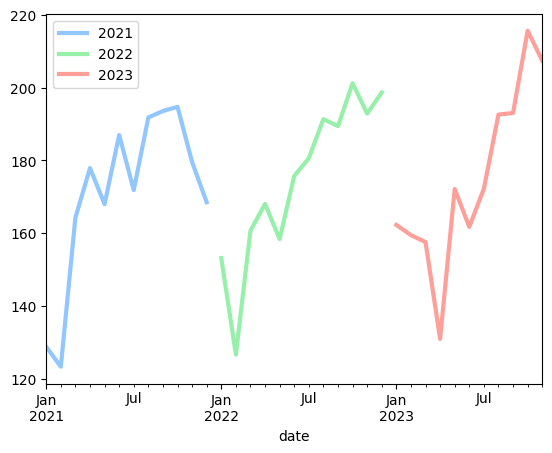

In [1981]:
# plot the feature 'Temperaturemax_Indonesia' only for 2022, and then only for 2021

data['pko_production_malaysia'].loc['2021-01-01':'2021-12-31'].plot()
data['pko_production_malaysia'].loc['2022-01-01':'2022-12-31'].plot()
data['pko_production_malaysia'].loc['2023-01-01':'2023-12-31'].plot()
plt.legend(['2021', '2022', '2023'])
plt.show()

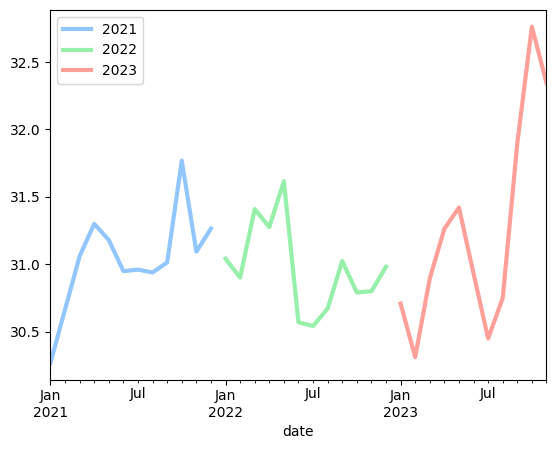

In [1982]:
# plot the feature 'Temperaturemax_Indonesia' only for 2022, and then only for 2021

data['Temperaturemax_Indonesia'].loc['2021-01-01':'2021-12-31'].plot()
data['Temperaturemax_Indonesia'].loc['2022-01-01':'2022-12-31'].plot()
data['Temperaturemax_Indonesia'].loc['2023-01-01':'2023-12-31'].plot()
plt.legend(['2021', '2022', '2023'])
plt.show()

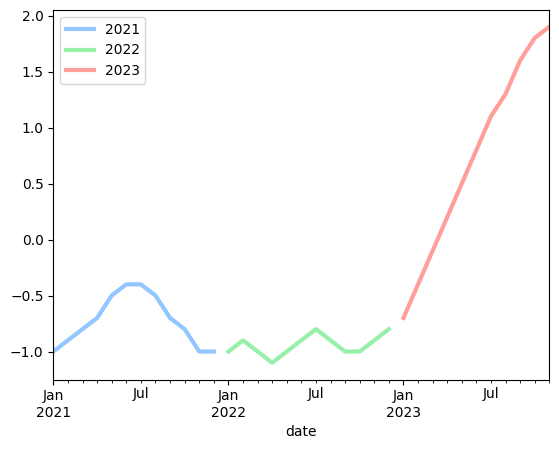

In [1983]:
data['ONI'].loc['2021-01-01':'2021-12-31'].plot()
data['ONI'].loc['2022-01-01':'2022-12-31'].plot()
data['ONI'].loc['2023-01-01':'2023-12-31'].plot()
plt.legend(['2021', '2022', '2023'])
plt.show()

In [1984]:
data.shape

(167, 33)

In [1985]:
data.columns

Index(['pko_cif_rotterdam', 'pko_monthly_stocks_malaysia',
       'pko_monthly_stocks_indonesia', 'Temperaturemax_Indonesia',
       'Temperaturemin_Malaysia', 'Temperaturemin_Indonesia',
       'Temperaturemax_Malaysia', 'Precipitation_Indonesia',
       'Precipitation_Malaysia', 'Humidex_Indonesia', 'Humidex_Malaysia',
       'ONI', 'pko_fob_malaysia', 'coconut_cif_rotterdam', 'ukraine_war',
       'malaysia_harvest', 'indonesia_harvest', 'myr_usd_rate', 'idr_usd_rate',
       'palm_oil_harvest_area_indonesia', 'palm_oil_production_indonesia',
       'pko_production_indonesia', 'palm_oil_harvest_area_malaysia',
       'palm_oil_production_malaysia', 'pko_production_malaysia',
       'pko_domestic_consumption_indonesia',
       'pko_domestic_consumption_malaysia', 'pko_exports_indonesia',
       'pko_exports_malaysia', 'pko_total_supply_indonesia',
       'pko_total_supply_malaysia', 'pmi_indonesia', 'pmi_malaysia'],
      dtype='object')

In [1986]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [1987]:
# convert series to 
def series_to_supervised(data, n_feat, n_in=1, n_out=1):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	# select only first 11 from df
	#df_custom = df.iloc[:, 0:11]
	# put the rest of the columns in df_rest
	df_rest = df.iloc[:, 11:]
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_feat)]
	# put it all together with df_rest
	#cols.append(df_rest)
	# append the rest of the column names
	#names += df_rest.columns.tolist()
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_feat)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_feat)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	agg.dropna(inplace=True)
	return agg

In [1990]:
# Our best model up until now: n_months = 6, n_features = 12, n_train_months = 149
n_features = 11
values = data.values
# keep only the first 11 columns
values = values[:, 0:n_features]
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# specify the number of lag months
n_months = 6
n_rest = 21
# frame as 
reframed = series_to_supervised(scaled, n_features, n_months, 1)
print(reframed.shape)

(161, 77)


In [1991]:
values=reframed.values
n_train_months = 149
train = values[:n_train_months, :]
test = values[n_train_months:, :]

In [1992]:
train.shape, test.shape

((149, 77), (12, 77))

In [1993]:
# split into input and outputs
n_obs = n_months * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_months, n_features))
test_X = test_X.reshape((test_X.shape[0], n_months, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(149, 6, 11) (149,) (12, 6, 11) (12,)


Epoch 1/100
3/3 - 4s - loss: 0.0468 - val_loss: 0.0191 - 4s/epoch - 1s/step
Epoch 2/100
3/3 - 1s - loss: 0.0413 - val_loss: 0.0433 - 742ms/epoch - 247ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0470 - val_loss: 0.0291 - 449ms/epoch - 150ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0372 - val_loss: 0.0120 - 293ms/epoch - 98ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0305 - val_loss: 0.0055 - 357ms/epoch - 119ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0284 - val_loss: 0.0055 - 138ms/epoch - 46ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0263 - val_loss: 0.0090 - 63ms/epoch - 21ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0252 - val_loss: 0.0135 - 66ms/epoch - 22ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0254 - val_loss: 0.0141 - 47ms/epoch - 16ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0242 - val_loss: 0.0104 - 59ms/epoch - 20ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0220 - val_loss: 0.0072 - 113ms/epoch - 38ms/step
Epoch 12/100
3/3 - 0s - loss: 0.0206 - val_loss: 0.0065 - 68ms/epoch - 23ms/step
Epoch 13/100
3/3 - 0s - loss: 0.

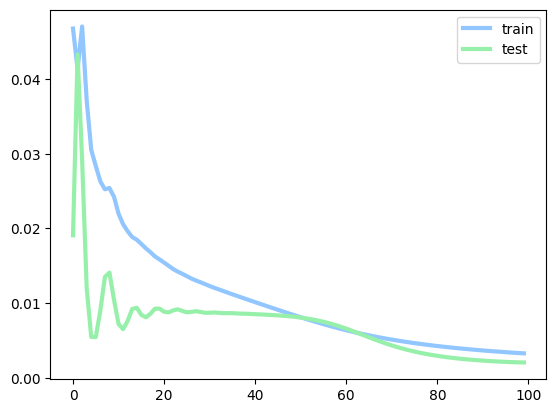

In [1994]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=64, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Epoch 1/100
5/5 - 3s - loss: 0.0793 - val_loss: 0.0100 - 3s/epoch - 654ms/step
Epoch 2/100
5/5 - 0s - loss: 0.0606 - val_loss: 0.0029 - 385ms/epoch - 77ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0582 - val_loss: 0.0060 - 211ms/epoch - 42ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0531 - val_loss: 0.0122 - 262ms/epoch - 52ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0499 - val_loss: 0.0143 - 122ms/epoch - 24ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0458 - val_loss: 0.0107 - 51ms/epoch - 10ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0418 - val_loss: 0.0079 - 66ms/epoch - 13ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0384 - val_loss: 0.0059 - 98ms/epoch - 20ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0357 - val_loss: 0.0057 - 115ms/epoch - 23ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0333 - val_loss: 0.0066 - 89ms/epoch - 18ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0310 - val_loss: 0.0071 - 50ms/epoch - 10ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0288 - val_loss: 0.0070 - 50ms/epoch - 10ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0

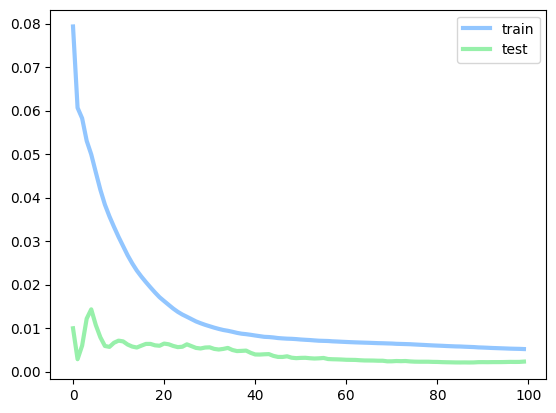

In [1995]:
from keras.layers import GRU
# design network
model2 = Sequential()
model2.add(GRU(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam')
# fit network
history = model2.fit(train_X, train_y, epochs=100, batch_size=32, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [1996]:
test_X.shape

(12, 6, 11)

In [1997]:
# what input shape does the model expect?
model.input_shape


(None, 6, 11)

In [1999]:
test_X_reshaped = test_X.reshape((test_X.shape[0], n_months, n_features))
yhat = model.predict(test_X_reshaped)
yhat

1/1 [==============================] - 0s 126ms/step


array([[0.32202592],
       [0.3166312 ],
       [0.28869998],
       [0.2592281 ],
       [0.25992662],
       [0.20937791],
       [0.14264247],
       [0.14682607],
       [0.1710976 ],
       [0.19785012],
       [0.2512346 ],
       [0.25255483]], dtype=float32)

In [2000]:
test_X.shape

(12, 6, 11)

In [2001]:
test_y.shape

(12,)

In [2002]:
test_X = test_X.reshape((test_X.shape[0], n_months*n_features))
test_X.shape

(12, 66)

In [2003]:
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -((n_features-1)):]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -(n_features-1):]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate 
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test : %.3f' % rmse)

Test : 84.889


In [2004]:
inv_yhat

array([1154.4765833 , 1144.36686492, 1092.02377105, 1036.79347873,
       1038.10248053,  943.37421209,  818.31198543,  826.15206179,
        871.63691443,  921.77113059, 1021.81362355, 1024.28775871])

In [2005]:
inv_y

array([1073., 1041., 1039., 1040., 1008.,  974.,  915.,  978.,  993.,
        945.,  906.,  966.])

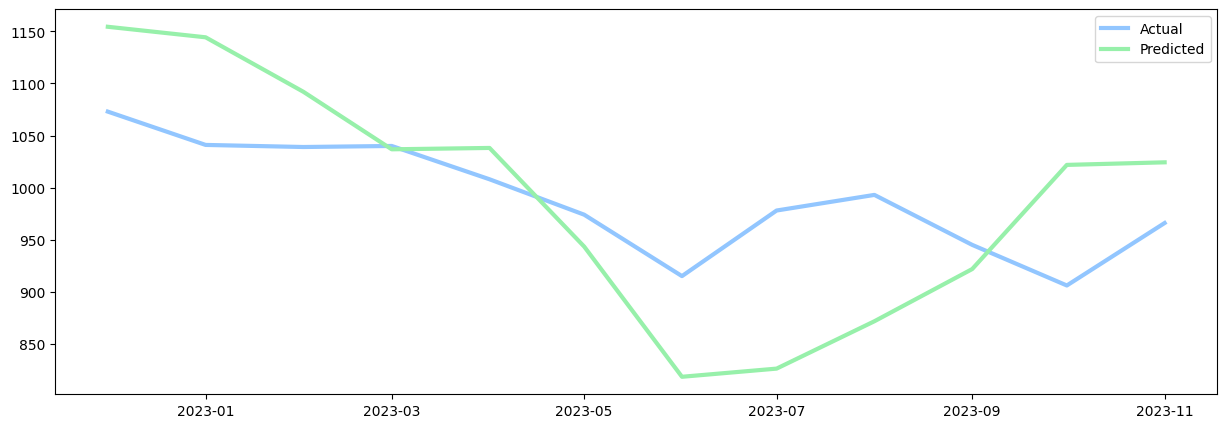

In [2006]:
# plot the actual and predicted values for the test data , x-axis should be date
plt.figure(figsize=(15, 5))
plt.plot(data.index[-(test_y.shape[0]):], inv_y, label='Actual')
plt.plot(data.index[-(test_y.shape[0]):], inv_yhat, label='Predicted')
plt.legend()
plt.show()

In [2007]:
dates = data.index[n_train_months+2:]
dates

DatetimeIndex(['2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01',
               '2022-12-01', '2023-01-01', '2023-02-01', '2023-03-01',
               '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01',
               '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01'],
              dtype='datetime64[ns]', name='date', freq=None)

In [2008]:
# create a dataframe with the dates, inv_yhat and inv_y
dates = data.index[n_train_months+6:]
df_results = pd.DataFrame({'date': dates, 'prediction': inv_yhat, 'actual': inv_y})
df_results

,date,prediction,actual
0,2022-12-01,1154.476583,1073.0
1,2023-01-01,1144.366865,1041.0
2,2023-02-01,1092.023771,1039.0
3,2023-03-01,1036.793479,1040.0
4,2023-04-01,1038.102481,1008.0
5,2023-05-01,943.374212,974.0
6,2023-06-01,818.311985,915.0
7,2023-07-01,826.152062,978.0
8,2023-08-01,871.636914,993.0
9,2023-09-01,921.771131,945.0


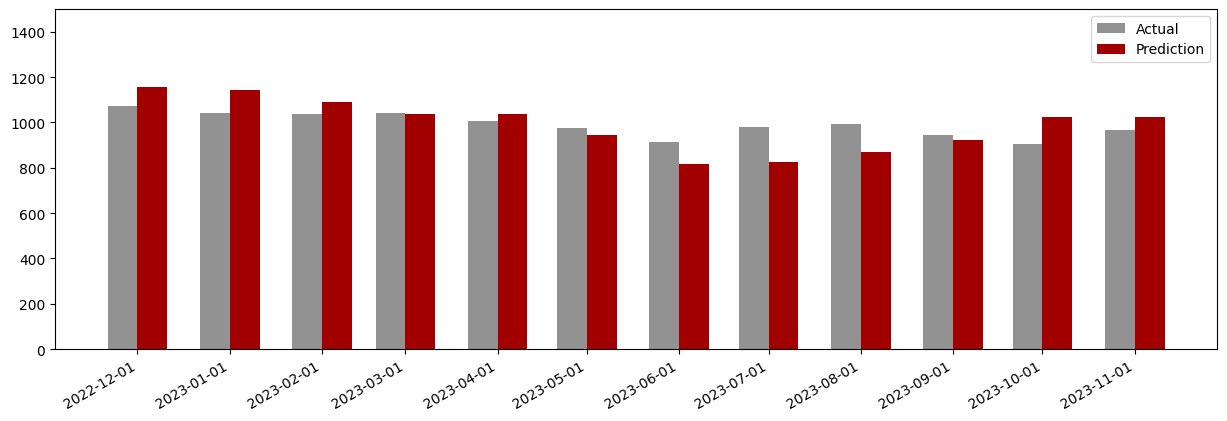

In [2009]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import timedelta

# Assuming df_results is your DataFrame with 'date', 'prediction', and 'actual' columns
plt.figure(figsize=(15, 5))
plt.ylim(0, 1500)

# Convert dates to matplotlib date format
dates = mdates.date2num(df_results['date'])

# Width of a bar
bar_width = 10  # You might need to adjust this based on your date scale

# Plotting
# GIVE ME LIGHT GRAY COLOR FOR THE FIRST BAR
plt.bar(dates - bar_width/2, df_results['actual'], width=bar_width, color='#929292', align='center', label='Actual')
plt.bar(dates + bar_width/2, df_results['prediction'], width=bar_width, color='#A20000', align='center', label='Prediction')

# Formatting dates on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Rotation

plt.legend()
plt.show()


In [2010]:
test_X

array([[0.51280683, 0.23226705, 0.52547997, 0.20415387, 0.69676273,
        0.37637089, 0.40925959, 0.60830822, 0.60062449, 0.47154447,
        0.59815742, 0.3810032 , 0.33530181, 0.53379401, 0.19449345,
        0.79099957, 0.22618185, 0.58243291, 0.53926775, 0.25426273,
        0.42693473, 0.69146348, 0.35538954, 0.428695  , 0.56174453,
        0.24145955, 0.68697783, 0.36938972, 0.44048131, 0.54302091,
        0.61597085, 0.38201956, 0.5772579 , 0.35645678, 0.47186924,
        0.58197773, 0.36913967, 0.66509719, 0.52412504, 0.34155786,
        0.50747306, 0.55811444, 0.45403276, 0.49044088, 0.24919957,
        0.65298158, 0.72148294, 0.28480254, 0.68780068, 0.57752797,
        0.30923301, 0.72359909, 0.93353733, 0.50405452, 0.472452  ,
        0.27427962, 0.80473185, 0.83633048, 0.28787021, 0.69259061,
        0.67761837, 0.22941935, 0.79997831, 0.80375267, 0.56972343,
        0.47689372],
       [0.3810032 , 0.33530181, 0.53379401, 0.19449345, 0.79099957,
        0.22618185, 0.58243

In [2011]:
test_X = test_X.reshape((test_X.shape[0], n_months, n_features))


In [2012]:
test_X.shape

(12, 6, 11)

In [2016]:
# Forecasting
last_sequence = test_X[-1]  # Last known sequence
forecast = []

# Set the number of months to forecast
future_steps = 6

for i in range(future_steps):
    # Predict the next step
    prediction = model.predict(last_sequence.reshape(1, n_months, n_features))
    forecast.append(prediction[0, 0])
    
    # Update the sequence
    new_sequence = np.roll(last_sequence, -1, axis=1)

    # Update the target feature with the prediction
    new_sequence[:, -1] = prediction[0, 0]

    # Update other features based on your strategy (e.g., roll, use prediction, etc.)
    # Example: If the second feature is a lagged version of the target, update it
    # new_sequence[:, -1, 1] = last_sequence[:, -2, 0]  # This is an example strategy

    last_sequence = new_sequence

# Inverse transform
# Prepare the data for inverse transformation
forecast_data = np.zeros((len(forecast), n_features))
forecast_data[:, 0] = forecast  # Update the target feature with forecasted values
last_known_features = test_X[-1, -1, 1:]  # Last known values of the other features
forecast_data[:, 1:] = last_known_features  # Update other features with the last known values
print(forecast_data)

inv_forecast = scaler.inverse_transform(forecast_data)
inv_forecast = inv_forecast[:, 0]  # Extract the forecasted target values

# Create a DataFrame for the forecasted values
forecast_dates = pd.date_range(start=df.index[-1], periods=future_steps + 1, freq='MS')[1:]
forecast_df = pd.DataFrame({'forecasted_data': inv_forecast}, index=forecast_dates)

# Print or visualize the forecasted data
print(forecast_df)

1/1 [==============================] - 0s 16ms/step
[[0.25255483 0.75784391 0.47536108 1.         0.77614346 0.63538186
  0.53769913 0.18837283 0.74242195 0.64724847 0.71647171]
 [0.60217875 0.75784391 0.47536108 1.         0.77614346 0.63538186
  0.53769913 0.18837283 0.74242195 0.64724847 0.71647171]
 [0.30718547 0.75784391 0.47536108 1.         0.77614346 0.63538186
  0.53769913 0.18837283 0.74242195 0.64724847 0.71647171]
 [0.49079689 0.75784391 0.47536108 1.         0.77614346 0.63538186
  0.53769913 0.18837283 0.74242195 0.64724847 0.71647171]
 [0.39708525 0.75784391 0.47536108 1.         0.77614346 0.63538186
  0.53769913 0.18837283 0.74242195 0.64724847 0.71647171]
 [0.36049891 0.75784391 0.47536108 1.         0.77614346 0.63538186
  0.53769913 0.18837283 0.74242195 0.64724847 0.71647171]]
            forecasted_data
2023-12-01      1024.287759
2024-01-01      1679.482982
2024-02-01      1126.665573
2024-03-01      1470.753379
2024-04-01      1295.137757
2024-05-01      1226.57

In [2018]:
# Forecasting with dynamic feature update using monthly averages
last_sequence = test_X[-1]  # Last known sequence
forecast = []

for i in range(future_steps):
    # Predict the next step
    prediction = model.predict(last_sequence.reshape(1, n_months, n_features))
    forecast.append(prediction[0, 0])
    
    # Update the sequence
    new_sequence = np.roll(last_sequence, -1, axis=1)

    # Update the target feature with the prediction
    new_sequence[-1, 0] = prediction[0, 0]

    # Update other features with their respective monthly averages
    # Assuming the month for forecasting is determined by (current month + i) % 12
    forecast_month = (averages_df.index[-1] + i) % 12 + 1
    monthly_averages = averages_df_arr[forecast_month - 1, 1:11]  # Get the averages for the forecast month
    new_sequence[-1, 1:] = monthly_averages # Update other features with monthly averages

    last_sequence = new_sequence

# Prepare the data for inverse transformation
forecast_data = np.zeros((len(forecast), n_features))
forecast_data[:, 0] = forecast  # Update the target feature with forecasted values
forecast_data[:, 1:] = last_sequence[-1, 1:]  # Update with the last known feature values

inv_forecast = scaler.inverse_transform(forecast_data)
inv_forecast = inv_forecast[:, 0]  # Extract the forecasted target values

# Create a DataFrame for the forecasted values
forecast_dates = pd.date_range(start=df.index[-1], periods=future_steps + 1, freq='MS')[1:]
forecast_df = pd.DataFrame({'forecasted_data': inv_forecast}, index=forecast_dates)

# Print or visualize the forecasted data
print(forecast_df)

1/1 [==============================] - 0s 12ms/step
            forecasted_data
2023-12-01      1024.287759
2024-01-01      1174.396331
2024-02-01      1061.351365
2024-03-01       869.238567
2024-04-01       807.300157
2024-05-01       911.579956


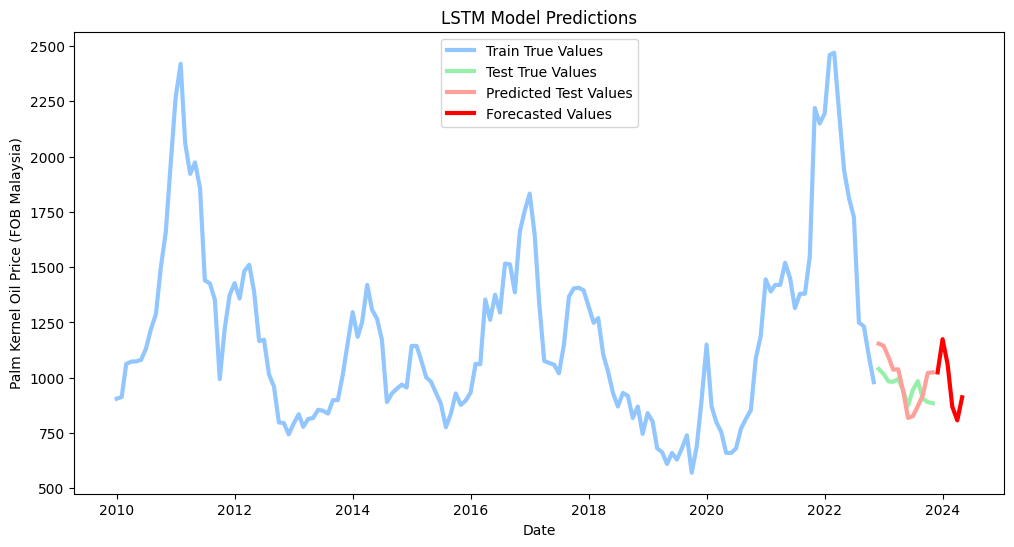

In [2019]:
# now plot the true values of the train and test set and then the future predicted values, plot after 2016

# make plot line bold and bigger
plt.rcParams['lines.linewidth'] = 3
plt.figure(figsize=(12, 6))
plt.plot(df.index[:n_train_months+n_months], df['pko_fob_malaysia'][:n_train_months+n_months], label='Train True Values')
plt.plot(df.index[n_train_months+n_months:], df['pko_fob_malaysia'][n_train_months+n_months:], label='Test True Values')
#plot with dashed line the line connecting the last value of train and first value of test set
#plt.plot([df.index[n_train_months+n_months-1], df.index[n_train_months+n_months]], [df['pko_cif_rotterdam'][n_train_months+n_months-1], df['pko_cif_rotterdam'][n_train_months+n_months]], linestyle='dashed')
# also plot the predicted test values
plt.plot(df_results['date'], df_results['prediction'], label='Predicted Test Values')
plt.plot(forecast_df.index, forecast_df['forecasted_data'], label='Forecasted Values', color='red')
plt.title('LSTM Model Predictions')
plt.xlabel('Date')
plt.ylabel('Palm Kernel Oil Price (FOB Malaysia)')
# add a nice theme 
plt.style.use('seaborn-v0_8-pastel')
plt.legend()
plt.show()